Notebook to extend the available training / test data. 

Background: the available reference data set contains only one template of each mitosis. The code in this notebook uses a template matching to identify the same mitosis in the previous or next frames. Each of these matches is added to the training data set. 

In [5]:
%matplotlib notebook 

import json
import numpy 
import os
import sys
import time

import skimage.io
import skimage.transform
import skimage.color
import skimage.feature 

import scipy.signal
import scipy.ndimage

import matplotlib.pyplot
import matplotlib.patches

In [6]:
# load image given the image number
def getImage(frameNr, imageDir):
    imageName = 'refdataB_C2_' + "%03i.png" % (frameNr,)
    image =  skimage.io.imread(imageDir + imageName)
    return skimage.color.rgb2gray(image)

# helper function to create the image given the frame number
def getImageName(frameNr, imageDir):
    return('refdataB_C2_' + "%03i.png" % (frameNr,))

# peform template matching and extract all areas that "match"
# the template, i.e. that have a correlation above a given 
# threshold. 
def  matchTemplateTemp(image, template, threshold):
    result = skimage.feature.match_template(image, template)
    diff = result > threshold
    labeled, num_objects = scipy.ndimage.label(diff)
    slices = scipy.ndimage.find_objects(labeled)
    x, y = [], []
    coordinates = []
    for dy,dx in slices:
        x_center = int((dx.start + dx.stop - 1)/2)
        y_center = int((dy.start + dy.stop - 1)/2)
        coordinates.append([x_center, y_center, result[y_center,x_center]])
    return(coordinates)

def norm2(x1,x2,y1,y2):
    return(  numpy.sqrt((x1-x2)*(x1-x2) + (y1 - y2)*(y1 - y2)))
    

def coordinatesFromFilename(fileName):
    frame, x, y = fileName.replace(".png","").split("_")
    frame = int(frame) 
    x = int(x) 
    y = int(y)
    return (x,y,frame)

In [ ]:
# directory storing 399 phase contrast image data belonging to cetres data
imageDir = '../../../../refdata_mitosis/cetres.b/image-contrast_2/'

# directory containing mitosis templates 
templateDir = '../data/mitoses_templates/'
templateFileList = os.listdir(templateDir)

# number of previous and next frames to search
searchRadius = 100
frameRadius = 5
# max number of frames 
frameMax = 399
threshold = 0.8

refdataB_C2_101.png


<IPython.core.display.Javascript object>


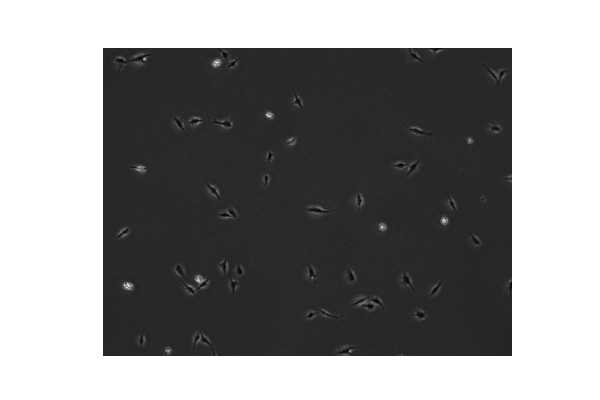

(-0.5, 1375.5, 1037.5, -0.5)

In [23]:
# show sample image
frame = 101
print(getImageName(frame,imageDir))
cellImage = getImage(frame, imageDir)

fig, ax = matplotlib.pyplot.subplots(figsize=(6, 4))
ax.imshow(cellImage, cmap = "gray")
matplotlib.pyplot.axis('off')

We use .split() to extract the frame, x and y coordinate from each filename.  

In [10]:
templatesPerImage = {}
templatesPerFrame = {}

for fileName in templateFileList:
    templateImage = skimage.color.rgb2gray(skimage.io.imread(templateDir + fileName))
    (x,y,frame) = coordinatesFromFilename(fileName)
        
    # loop over previous and next images
    for iFrame in range(frame - frameRadius, frame + frameRadius):
        
        if iFrame > 0 and iFrame <= frameMax:
            cellImage = getImage(iFrame, imageDir)
            coordinates = matchTemplateTemp(cellImage, templateImage,threshold)
            
            # We make sure the matching cell is within the search radius  
            for iCoord in coordinates:
                if norm2(x,iCoord[0],y,iCoord[1]) < searchRadius:
                    try: templatesPerImage[getImageName(iFrame,imageDir)].append( (iCoord[0],iCoord[1],iCoord[2]) )
                    except: templatesPerImage[getImageName(iFrame,imageDir)] = [ (iCoord[0],iCoord[1],iCoord[2]) ]
                    try: templatesPerFrame[iFrame].append( (iCoord[0],iCoord[1],iCoord[2]) )
                    except: templatesPerFrame[iFrame] = [ (iCoord[0],iCoord[1],iCoord[2]) ]

14
34
41
78
89
92
95
99
99
99
101
101
102
103
104
106
106
108
108
111
111
112
113
113
117
118
118
120
121
121
122
124
124
126
126
128
131
140
141
149
150
157
158
160
162
163
167
167
169
169
170
170
170
171
171
171
173
174
175
175
175
178
180
181
181
182
182
183
183
183
183
183
184
184
185
185
187
188
188
189
189
191
194
195
195
197
198
198
198
199
201
201
201
201
202
205
206
206
207
209
211
211
213
213
214
215
215
216
217
217
217
218
218
219
219
220
220
221
221
223
223
224
225
225
227
227
228
229
232
236
236
236
236
237
238
238
240
241
242
243
248
248
248
249
250
251
252
255
256
256
259
259
260
261
261
262
263
264
265
265
266
266
267
269
269
270
270
272
272
272
273
273
273
274
274
275
275
276
276
276
277
277
278
278
278
279
279
279
279
280
281
281
282
282
282
283
283
284
285
285
286
288
288
288
289
289
289
290
290
290
290
290
291
292
292
292
293
293
294
295
295
295
296
296
297
297
297
298
298
298
298
299
299
299
300
301
301
302
302
302
302
302
303
303
303
304
304
304
304
305
305
305
30

## Plot bounding boxes in a time series 
In the following code two ways are shown to plot bounding boxes. 
The first uses matplotlib.patches; this is the most convenient one. The second version plots the bounding boxes using the x y coordinates and a imple plot() command. The second version is used to test if the bounding boxes stored in the json file are correct. 

<IPython.core.display.Javascript object>


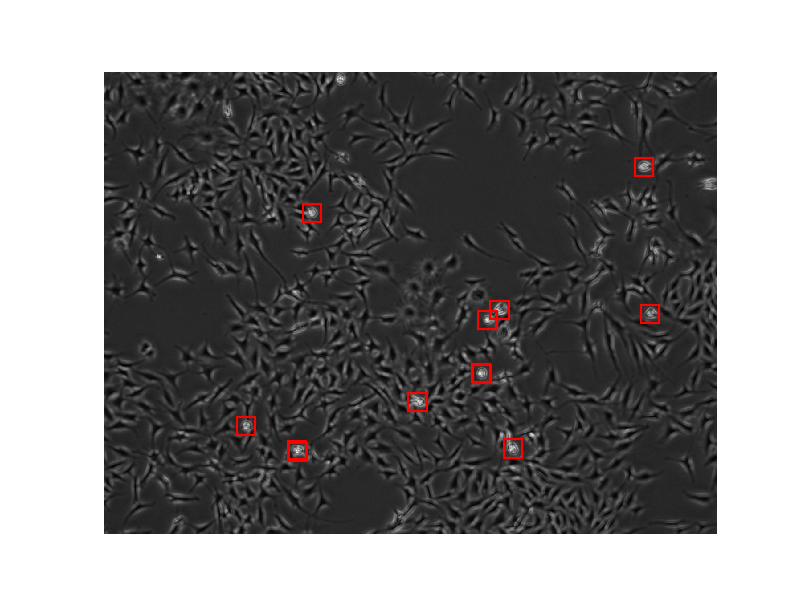

In [22]:
# using matplotlib we can updated the figure each iteration 
fig, ax = matplotlib.pyplot.subplots(figsize=(8, 6))

for frame in range(1,399,1):   
    # clear axis to remove patches (rect objects)
    matplotlib.pyplot.cla()
    cellImage = getImage(frame, imageDir)
    ax.imshow(cellImage,cmap='gray')
    matplotlib.pyplot.axis('off')
    # ignore frames without mitotic events
    if frame in templatesPerFrame:
        for corner in templatesPerFrame[frame]:
            #rect = matplotlib.patches.Rectangle(corner, 41, 41, fill=False, edgecolor='red', linewidth=2)
            #ax.add_patch(rect)
            x1 = corner[0]
            x2 = (x1 + 41) 
            y1 = corner[1] 
            y2 = (y1 + 41)
            matplotlib.pyplot.plot([x1, x2], [y1, y1], 'r-')
            matplotlib.pyplot.plot([x1, x2], [y2, y2], 'r-')
            matplotlib.pyplot.plot([x2, x2], [y1, y2], 'r-')
            matplotlib.pyplot.plot([x1, x1], [y1, y2], 'r-')
        
    # make each frame visible
    fig.canvas.draw()
    

## Export template list as json file

To use the keras-rcnn implementation we store the training data in a json file. This data file stores the filename and the bounding boxes of the objects in the images.

We follow the format in the example data from Hung et al. that can be downloaded at http://keras-rcnn.storage.googleapis.com/malaria.tar.gz

In [21]:
# loop over all image
templateList = []

for key in templatesPerImage:
    template = {}
    boxList = []
    
    for xy in templatesPerImage[key]:
        x = xy[0]
        y = xy[1]
        theta = xy[2]
        bbox = {"class" : "mitosis", 
                "x1" : x, 
                "x2" : (x + 41) , 
                "y1" : y, 
                "y2" : (y + 41)
               } 
        boxList.append(bbox)
    
    template = {"boxes" : boxList, 
         "filename" : key, 
         "shape" : [1376, 1038, 3] 
        }
    
    templateList.append(template)  
    
with open('extendedTemplates.json', 'w') as fp:
    json.dump(templateList, fp, indent=4)  